In [1]:
import pandas as pd
import numpy as np
from parsers.parse_triqler import  parse_triqler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.random as npr
import argparse
sns.set_context("talk")

from plot_calibration_curve_step import *

In [2]:
def calibration_plot(df, xlim = [0,0.10], ylim = [0,0.20]):
    fig, axs = plt.subplots(1, 1, figsize=(10,6))
    #sns.lineplot(x = "FDR", y = "actual_error", data = df, ax = axs, hue = "method")
    sns.lineplot(x = "FDR", y = "Fraction_HeLa", data = df, ax = axs, hue = "Method")
    
    #axs.plot(df[df["Method"] == "Triqler"].FDR, df[df["Method"] == "Triqler"].Fraction_HeLa)
    #axs.plot(df[df["Method"] == "Top3"].FDR, df[df["Method"] == "Top3"].Fraction_HeLa)
    #axs.plot(df[df["Method"] == "MsStats"].FDR, df[df["Method"] == "MsStats"].Fraction_HeLa)
    #axs.plot(df[df["Method"] == "MsqRob2"].FDR, df[df["Method"] == "MsqRob2"].Fraction_HeLa)     

    #axs.set_xlabel(r"\textit{q}-value / FDR ", fontsize=34)
    #axs.set_ylabel("Fraction HeLa", fontsize=38)

    axs.set_xlabel("FDR", fontsize=24)
    axs.set_ylabel(r"Fraction HeLa", fontsize=24)

    axs.tick_params(axis='x', which='major', labelsize=21)#labelrotation=90)
    axs.tick_params(axis='y', which='major', labelsize=21)
    axs.set_xlim(xlim)
    axs.set_ylim(ylim)

    def abline(slope, intercept):
        """Plot a line from slope and intercept"""
        #axes = plt.gca()
        x_vals = np.array(axs.get_xlim())
        y_vals = intercept + slope * x_vals
        axs.plot(x_vals, y_vals, 'k--', alpha = 0.7)
    abline(1,0)


In [3]:
def read_files(triqler_file, top3_file, msstats_file, msqrob2_file, fc_threshold = 0):
    triqler = parse_triqler(triqler_file)
    #triqler[~triqler.protein.str.contains("DECOY")]
    triqler["specie"] = triqler.protein.map(lambda x:x.split("_")[1])
    triqler["FDR"] = triqler["q_value"]
    triqler.rename({"protein":"Protein"}, axis = 1, inplace = True)
    top3 = pd.read_csv(top3_file, sep = "\t").rename({"q":"FDR", 'log2(A,B)':"log2FC"}, axis = 1)
    top3.rename({"ProteinName":"Protein"}, axis = 1, inplace = True)
    msstats = pd.read_csv(msstats_file, sep = ",").rename({"adj.pvalue":"FDR", "pvalue":"p"}, axis = 1)
    msstats["specie"] = msstats.Protein.map(lambda x:x.split("_")[1])
    msqrob2 = pd.read_csv(msqrob2_file, sep = ",").rename({"Unnamed: 0":"protein", "adjPval":"FDR", "pval":"p", "logFC":"log2FC"}, axis = 1)
    msqrob2.rename({"protein":"Protein"}, axis = 1, inplace = True)
    msqrob2["specie"] = msqrob2.Protein.map(lambda x:x.split("_")[1])
    msqrob2.rename({"protein":"Protein"}, axis = 1, inplace = True)
    
    if fc_threshold != 0:
        top3 = threshold_fc(top3, fc_threshold)
        msstats = threshold_fc(msstats, fc_threshold)
        msqrob2 = threshold_fc(msqrob2, fc_threshold)

    
    return triqler, top3, msstats, msqrob2

In [4]:
def plot(fc_threshold):
    triqler, top3, msstats, msqrob2 = read_files(triqler_file, top3_file, msstats_file, msqrob2_file, fc_threshold)
    df = get_fraction_hela_df(triqler, top3, msstats, msqrob2)
    calibration_plot(df)


# PS

In [5]:

datadir = "results_0.51_2022-05-10/PS/"
triqler_file = datadir+"triqler_results.csv"
top3_file = datadir+"top3_results.csv"
msstats_file = datadir+"msstats_results.csv"
msqrob2_file = datadir+"msqrob2_results.csv"

## PS - no threshold

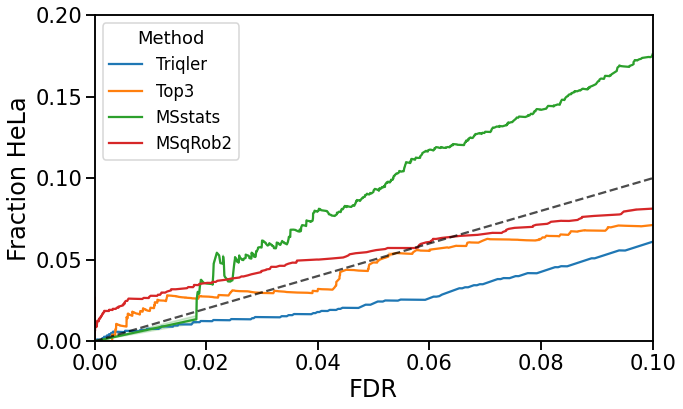

In [6]:
plot(fc_threshold = 0)

In [7]:
triqler, top3, msstats, msqrob2 = read_files(triqler_file, top3_file, msstats_file, msqrob2_file)


In [8]:
triqler.sort_values("q_value").head()

,Protein,peptides,q_value,posterior_error_prob,num_peptides,protein_id_posterior_error_prob,log2_fold_change,diff_exp_prob_0.51,1:002-Pedro,1:004-Pedro,1:006-Pedro,2:003-Pedro,2:005-Pedro,2:007-Pedro,specie,FDR
0,P0A9M0_ECOLI,IEIPVLPLR;AEYLESPTIDEREQEVLVR;KGELTVDDSAIIGIIR...,2.395000e-08,2.395000e-08,15.0,1.250000e-09,-1.984,2.270000e-08,0.4640,0.5095,0.5416,1.922,1.974,2.059,ECOLI,2.395000e-08
1,P21889_ECOLI,FGFLLDALK;ADVLPLDSNHVNTEEAR;DREGIVQVFFDPDRADAL...,3.169000e-08,3.943000e-08,11.0,5.280000e-09,-1.858,3.415000e-08,0.4960,0.5364,0.5431,1.860,1.911,1.947,ECOLI,3.169000e-08
2,P61889_ECOLI,GFSGEDATPALEGADVVLISAGVAR;RIQNAGTEVVEAK;IQNAGT...,3.574000e-08,4.386000e-08,18.0,3.251000e-10,-1.841,4.353000e-08,0.4944,0.5395,0.5521,1.863,1.899,1.920,ECOLI,3.574000e-08
3,P0ABB4_ECOLI,YTLAGTEVSALLGR;VYDALEVQNGNER;GLDVKDLEHPIEVPVGK...,3.890000e-08,4.836000e-08,23.0,1.408000e-10,-1.832,4.822000e-08,0.5005,0.5557,0.5371,1.818,1.900,1.938,ECOLI,3.890000e-08
4,P69797_ECOLI,TLLTQVAPPGVTAHVVDVAK;IIVVSDEVAADTVRK;GVLFLVDTW...,4.097000e-08,4.926000e-08,12.0,4.869000e-09,-1.827,4.439000e-08,0.5064,0.5391,0.5426,1.831,1.858,1.984,ECOLI,4.097000e-08


In [9]:
top3.sort_values("FDR").head()

,specie,Protein,1,2,p,FDR,log2FC
1628,ECOLI,P68767_ECOLI,6.511358,8.585226,6.731432e-07,0.000491,-2.073868
1629,ECOLI,P68919_ECOLI,8.198156,11.136597,5.663189e-07,0.000491,-2.938441
621,ECOLI,P0ADG7_ECOLI,9.146841,10.942095,7.659637e-07,0.000491,-1.795254
821,YEAST,P17555_YEAST,9.474360,8.573992,2.654111e-06,0.000704,0.900369
489,ECOLI,P0A8F0_ECOLI,8.543637,10.432569,3.043798e-06,0.000704,-1.888932


In [10]:
msstats.sort_values("FDR").head()

,Protein,Label,log2FC,SE,Tvalue,DF,p,FDR,issue,MissingPercentage,ImputationPercentage,specie
1737,P48510_YEAST,T2-T1,-inf,NaN,NaN,NaN,NaN,0.0,oneConditionMissing,NaN,NaN,YEAST
2269,Q12155_YEAST,T2-T1,-inf,NaN,NaN,NaN,NaN,0.0,oneConditionMissing,NaN,NaN,YEAST
689,P0AAV6_ECOLI,T2-T1,inf,NaN,NaN,NaN,NaN,0.0,oneConditionMissing,NaN,NaN,ECOLI
2204,Q06338_YEAST,T2-T1,-inf,NaN,NaN,NaN,NaN,0.0,oneConditionMissing,NaN,NaN,YEAST
793,P0AE82_ECOLI,T2-T1,inf,NaN,NaN,NaN,NaN,0.0,oneConditionMissing,NaN,NaN,ECOLI


In [11]:
msqrob2.sort_values("FDR").head()

,Protein,log2FC,se,df,t,p,FDR,specie
860,P0AG59_ECOLI,6.125270,0.156893,8.928585,39.041104,2.745721e-11,8.756103e-08,ECOLI
1171,P25515_YEAST,-2.824010,0.120774,10.257644,-23.382598,3.102335e-10,4.946673e-07,YEAST
655,P0A9M0_ECOLI,1.871756,0.114707,10.257644,16.317713,1.134905e-08,7.617906e-07,ECOLI
645,P0A9D2_ECOLI,2.177810,0.118619,10.205143,18.359696,3.765840e-09,7.617906e-07,ECOLI
1017,P17169_ECOLI,1.800289,0.113449,10.186105,15.868718,1.628383e-08,7.617906e-07,ECOLI


In [12]:
## PS - FC threshold = 0.51

pi_0 estimated to 0.7574915617229374
pi_0 estimated to 0.7714945891018272
pi_0 estimated to 0.39171870132057895


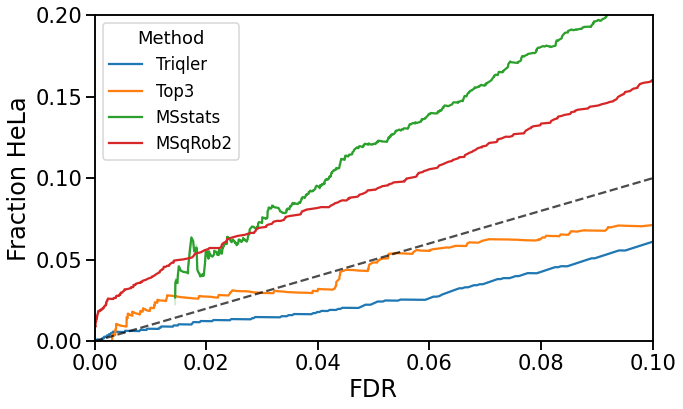

In [13]:
plot(fc_threshold = 0.51)

In [14]:
triqler, top3, msstats, msqrob2 = read_files(triqler_file, top3_file, msstats_file, msqrob2_file, fc_threshold = 0.51)


pi_0 estimated to 0.7574915617229374
pi_0 estimated to 0.7714945891018272
pi_0 estimated to 0.38494393442977476


In [15]:
triqler.sort_values("q_value").head()

,Protein,peptides,q_value,posterior_error_prob,num_peptides,protein_id_posterior_error_prob,log2_fold_change,diff_exp_prob_0.51,1:002-Pedro,1:004-Pedro,1:006-Pedro,2:003-Pedro,2:005-Pedro,2:007-Pedro,specie,FDR
0,P0A9M0_ECOLI,IEIPVLPLR;AEYLESPTIDEREQEVLVR;KGELTVDDSAIIGIIR...,2.395000e-08,2.395000e-08,15.0,1.250000e-09,-1.984,2.270000e-08,0.4640,0.5095,0.5416,1.922,1.974,2.059,ECOLI,2.395000e-08
1,P21889_ECOLI,FGFLLDALK;ADVLPLDSNHVNTEEAR;DREGIVQVFFDPDRADAL...,3.169000e-08,3.943000e-08,11.0,5.280000e-09,-1.858,3.415000e-08,0.4960,0.5364,0.5431,1.860,1.911,1.947,ECOLI,3.169000e-08
2,P61889_ECOLI,GFSGEDATPALEGADVVLISAGVAR;RIQNAGTEVVEAK;IQNAGT...,3.574000e-08,4.386000e-08,18.0,3.251000e-10,-1.841,4.353000e-08,0.4944,0.5395,0.5521,1.863,1.899,1.920,ECOLI,3.574000e-08
3,P0ABB4_ECOLI,YTLAGTEVSALLGR;VYDALEVQNGNER;GLDVKDLEHPIEVPVGK...,3.890000e-08,4.836000e-08,23.0,1.408000e-10,-1.832,4.822000e-08,0.5005,0.5557,0.5371,1.818,1.900,1.938,ECOLI,3.890000e-08
4,P69797_ECOLI,TLLTQVAPPGVTAHVVDVAK;IIVVSDEVAADTVRK;GVLFLVDTW...,4.097000e-08,4.926000e-08,12.0,4.869000e-09,-1.827,4.439000e-08,0.5064,0.5391,0.5426,1.831,1.858,1.984,ECOLI,4.097000e-08


In [16]:
top3.sort_values("FDR").head()

,specie,Protein,1,2,p,FDR,log2FC,q
1629,ECOLI,P68919_ECOLI,8.198156,11.136597,5.663189e-07,0.000491,-2.938441,0.000491
1628,ECOLI,P68767_ECOLI,6.511358,8.585226,6.731432e-07,0.000491,-2.073868,0.000491
621,ECOLI,P0ADG7_ECOLI,9.146841,10.942095,7.659637e-07,0.000491,-1.795254,0.000491
219,YEAST,P00937_YEAST,9.105340,8.117242,5.127632e-06,0.000704,0.988097,0.000704
822,YEAST,P17649_YEAST,9.725804,8.634030,4.960163e-06,0.000704,1.091774,0.000704


In [17]:
msstats.sort_values("FDR").head()

,Protein,Label,log2FC,SE,Tvalue,DF,p,FDR,issue,MissingPercentage,ImputationPercentage,specie,q
575,P0A7V3_ECOLI,T2-T1,1.238336,0.004058,305.160536,2.0,0.000011,0.014442,NaN,0.133333,0.133333,ECOLI,0.014442
607,P0A8K1_ECOLI,T2-T1,0.903115,0.013266,68.077249,2.0,0.000216,0.014442,NaN,0.166667,0.166667,ECOLI,0.014442
1519,P38788_YEAST,T2-T1,-0.905399,0.013428,-67.425667,2.0,0.000220,0.014442,NaN,0.113232,0.113232,YEAST,0.014442
2008,P64463_ECOLI,T2-T1,1.213724,0.018383,66.025547,2.0,0.000229,0.014442,NaN,0.125000,0.125000,ECOLI,0.014442
492,P0A6F3_ECOLI,T2-T1,1.334762,0.020559,64.921947,2.0,0.000237,0.014442,NaN,0.093750,0.093750,ECOLI,0.014442


In [18]:
msqrob2.sort_values("FDR").head()

,Protein,log2FC,se,df,t,p,FDR,specie,q
860,P0AG59_ECOLI,6.125270,0.156893,8.928585,39.041104,2.745721e-11,3.370609e-08,ECOLI,3.370609e-08
1171,P25515_YEAST,-2.824010,0.120774,10.257644,-23.382598,3.102335e-10,1.904192e-07,YEAST,1.904192e-07
2029,P67910_ECOLI,1.685775,0.110306,10.257644,15.282665,2.169150e-08,2.932467e-07,ECOLI,2.932467e-07
342,P05055_ECOLI,1.692364,0.110648,10.257644,15.295027,2.151924e-08,2.932467e-07,ECOLI,2.932467e-07
768,P0ADB7_ECOLI,1.777450,0.116078,10.257644,15.312556,2.127752e-08,2.932467e-07,ECOLI,2.932467e-07


In [19]:
datadir = "results_0.51_2022-05-10/ID/"
triqler_file = datadir+"triqler_results.csv"
top3_file = datadir+"top3_results.csv"
msstats_file = datadir+"msstats_results.csv"
msqrob2_file = datadir+"msqrob2_results.csv"

## ID - no threshold

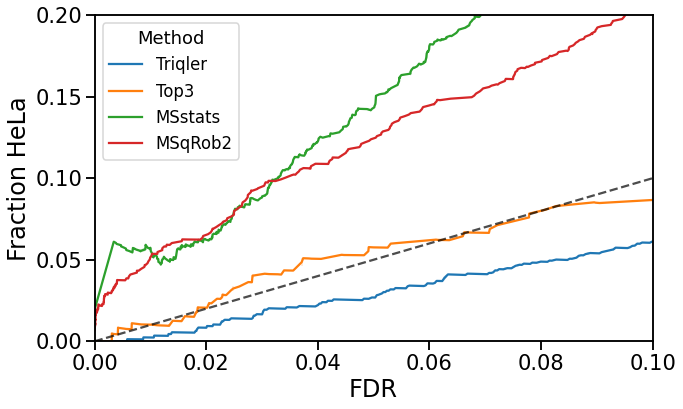

In [20]:
plot(fc_threshold = 0)

In [21]:
triqler, top3, msstats, msqrob2 = read_files(triqler_file, top3_file, msstats_file, msqrob2_file, fc_threshold = 0)


In [22]:
triqler.sort_values("q_value").head()

,Protein,peptides,q_value,posterior_error_prob,num_peptides,protein_id_posterior_error_prob,log2_fold_change,diff_exp_prob_0.51,1:002-Pedro,1:004-Pedro,1:006-Pedro,2:003-Pedro,2:005-Pedro,2:007-Pedro,specie,FDR
0,P0AB71_ECOLI,DSVSYGVVK;AFQELNAIDVL;ANEAYLQGQLGNPK;APVIVQFSN...,0.000003,0.000003,26.0,2.710000e-07,-1.900,0.000003,0.5014,0.5259,0.5264,1.837,1.925,2.037,ECOLI,0.000003
1,P0A799_ECOLI,VATEFSETAPATLK;LLTTC(UniMod:4)NIPVPSDVR;ADLNVP...,0.000004,0.000005,33.0,6.983000e-08,-1.912,0.000005,0.4754,0.5401,0.5340,1.889,1.927,2.004,ECOLI,0.000004
2,P08997_ECOLI,GIPADLEDR;VIASELGEER;ALFRQMLGEEMK;GSGPYFYLPK;K...,0.000004,0.000005,28.0,2.814000e-07,-1.849,0.000005,0.4929,0.5265,0.5615,1.852,1.852,2.002,ECOLI,0.000004
3,P06959_ECOLI,EFGVNLAK;AVAAALEQMPR;LMLPISLSFDHR;FNSSLSEDGQR;...,0.000005,0.000005,23.0,1.308000e-06,-2.023,0.000004,0.4987,0.5404,0.4514,1.888,2.017,2.159,ECOLI,0.000005
4,P0A8T7_ECOLI,LLDLAAPDIIVR;SVITVGPYLR;VLTEAAVAGK;MLNTC(UniMo...,0.000005,0.000005,42.0,1.245000e-07,-1.851,0.000005,0.5026,0.5525,0.5292,1.791,1.890,2.010,ECOLI,0.000005


In [23]:
top3.sort_values("FDR").head()

,specie,Protein,1,2,p,FDR,log2FC
369,ECOLI,P0AG55_ECOLI,12.520581,14.315714,2.292068e-08,0.000023,-1.795133
372,ECOLI,P0AG84_ECOLI,9.520103,11.438909,6.746294e-08,0.000034,-1.918806
430,YEAST,P15180_YEAST,12.988765,11.935205,5.206493e-07,0.000129,1.053560
269,ECOLI,P0A7L8_ECOLI,9.580850,12.550525,7.629539e-07,0.000129,-2.969675
323,ECOLI,P0ABD3_ECOLI,12.823840,14.724761,6.924660e-07,0.000129,-1.900921


In [24]:
msstats.sort_values("FDR").head()

,Protein,Label,log2FC,SE,Tvalue,DF,p,FDR,issue,MissingPercentage,ImputationPercentage,specie
1027,P31120_ECOLI,T2-T1,inf,NaN,NaN,NaN,NaN,0.0,oneConditionMissing,NaN,NaN,ECOLI
441,P0A7I4_ECOLI,T2-T1,inf,NaN,NaN,NaN,NaN,0.0,oneConditionMissing,NaN,NaN,ECOLI
915,P24521_YEAST,T2-T1,-inf,NaN,NaN,NaN,NaN,0.0,oneConditionMissing,NaN,NaN,YEAST
556,P0ABA0_ECOLI,T2-T1,inf,NaN,NaN,NaN,NaN,0.0,oneConditionMissing,NaN,NaN,ECOLI
938,P25526_ECOLI,T2-T1,inf,NaN,NaN,NaN,NaN,0.0,oneConditionMissing,NaN,NaN,ECOLI


In [25]:
msqrob2.sort_values("FDR").head()

,Protein,log2FC,se,df,t,p,FDR,specie
678,P0ABH7_ECOLI,1.645773,0.093945,7.778301,17.518481,1.574389e-07,0.000004,ECOLI
513,P0A799_ECOLI,1.818097,0.083078,7.778301,21.884344,2.877184e-08,0.000004,ECOLI
515,P0A7A9_ECOLI,1.803282,0.090611,7.778301,19.901403,5.953310e-08,0.000004,ECOLI
525,P0A7J3_ECOLI,1.601850,0.093721,7.778301,17.091717,1.899017e-07,0.000004,ECOLI
526,P0A7J7_ECOLI,1.689552,0.091053,7.778301,18.555778,1.015944e-07,0.000004,ECOLI


## ID - FC threshold = 0.51

pi_0 estimated to 0.7445734477536596
pi_0 estimated to 0.7759321182925892
pi_0 estimated to 0.28917480407359264


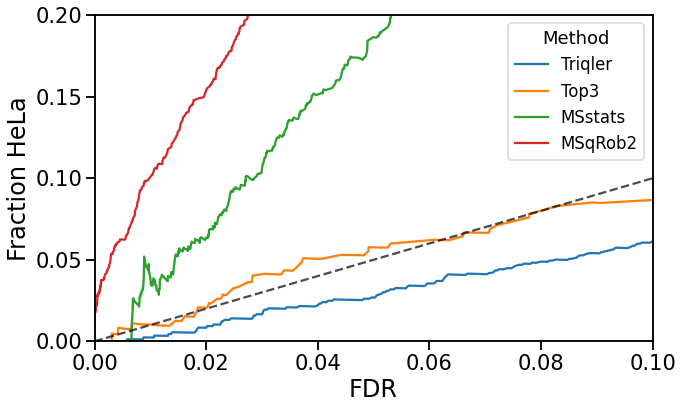

In [26]:
plot(fc_threshold = 0.51)

In [27]:
triqler, top3, msstats, msqrob2 = read_files(triqler_file, top3_file, msstats_file, msqrob2_file, fc_threshold = 0.51)


pi_0 estimated to 0.7445734477536596
pi_0 estimated to 0.7759321182925892
pi_0 estimated to 0.28055651374037016


In [28]:
triqler.sort_values("q_value").head()

,Protein,peptides,q_value,posterior_error_prob,num_peptides,protein_id_posterior_error_prob,log2_fold_change,diff_exp_prob_0.51,1:002-Pedro,1:004-Pedro,1:006-Pedro,2:003-Pedro,2:005-Pedro,2:007-Pedro,specie,FDR
0,P0AB71_ECOLI,DSVSYGVVK;AFQELNAIDVL;ANEAYLQGQLGNPK;APVIVQFSN...,0.000003,0.000003,26.0,2.710000e-07,-1.900,0.000003,0.5014,0.5259,0.5264,1.837,1.925,2.037,ECOLI,0.000003
1,P0A799_ECOLI,VATEFSETAPATLK;LLTTC(UniMod:4)NIPVPSDVR;ADLNVP...,0.000004,0.000005,33.0,6.983000e-08,-1.912,0.000005,0.4754,0.5401,0.5340,1.889,1.927,2.004,ECOLI,0.000004
2,P08997_ECOLI,GIPADLEDR;VIASELGEER;ALFRQMLGEEMK;GSGPYFYLPK;K...,0.000004,0.000005,28.0,2.814000e-07,-1.849,0.000005,0.4929,0.5265,0.5615,1.852,1.852,2.002,ECOLI,0.000004
3,P06959_ECOLI,EFGVNLAK;AVAAALEQMPR;LMLPISLSFDHR;FNSSLSEDGQR;...,0.000005,0.000005,23.0,1.308000e-06,-2.023,0.000004,0.4987,0.5404,0.4514,1.888,2.017,2.159,ECOLI,0.000005
4,P0A8T7_ECOLI,LLDLAAPDIIVR;SVITVGPYLR;VLTEAAVAGK;MLNTC(UniMo...,0.000005,0.000005,42.0,1.245000e-07,-1.851,0.000005,0.5026,0.5525,0.5292,1.791,1.890,2.010,ECOLI,0.000005


In [29]:
top3.sort_values("FDR").head()

,specie,Protein,1,2,p,FDR,log2FC,q
369,ECOLI,P0AG55_ECOLI,12.520581,14.315714,2.292068e-08,0.000023,-1.795133,0.000023
372,ECOLI,P0AG84_ECOLI,9.520103,11.438909,6.746294e-08,0.000034,-1.918806,0.000034
430,YEAST,P15180_YEAST,12.988765,11.935205,5.206493e-07,0.000129,1.053560,0.000129
323,ECOLI,P0ABD3_ECOLI,12.823840,14.724761,6.924660e-07,0.000129,-1.900921,0.000129
248,ECOLI,P0A6M8_ECOLI,13.081802,15.027986,6.925125e-07,0.000129,-1.946184,0.000129


In [30]:
msstats.sort_values("FDR").head()

,Protein,Label,log2FC,SE,Tvalue,DF,p,FDR,issue,MissingPercentage,ImputationPercentage,specie,q
190,P00445_YEAST,T2-T1,-1.214716,0.001622,-748.819068,2.0,0.000002,0.003336,NaN,0.103448,0.103448,YEAST,0.003336
325,P07284_YEAST,T2-T1,-1.283111,0.003059,-419.503441,2.0,0.000006,0.003692,NaN,0.229167,0.229167,YEAST,0.003692
459,P0A7S9_ECOLI,T2-T1,1.678825,0.004980,337.080136,2.0,0.000009,0.003692,NaN,0.207407,0.207407,ECOLI,0.003692
468,P0A7X3_ECOLI,T2-T1,1.782209,0.005946,299.728094,2.0,0.000011,0.003692,NaN,0.214815,0.214815,ECOLI,0.003692
431,P0A796_ECOLI,T2-T1,1.934759,0.006559,294.981235,2.0,0.000011,0.003692,NaN,0.324074,0.324074,ECOLI,0.003692


In [31]:
msqrob2.sort_values("FDR").head()

,Protein,log2FC,se,df,t,p,FDR,specie,q
1132,P25738_ECOLI,2.005157,0.083387,7.776037,24.046358,1.401455e-08,0.000001,ECOLI,0.000001
492,P0A6V8_ECOLI,1.852115,0.104875,7.778301,17.660279,1.480742e-07,0.000001,ECOLI,0.000001
826,P0AGD3_ECOLI,1.788438,0.090629,7.235263,19.733630,1.477351e-07,0.000001,ECOLI,0.000001
588,P0A8T7_ECOLI,1.682235,0.094864,7.778301,17.733110,1.435091e-07,0.000001,ECOLI,0.000001
1816,P60438_ECOLI,1.497006,0.084318,7.778301,17.754258,1.422134e-07,0.000001,ECOLI,0.000001
